In [1]:
from plantcv import plantcv as pcv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import skimage.morphology as morph
import skimage
import skimage.io

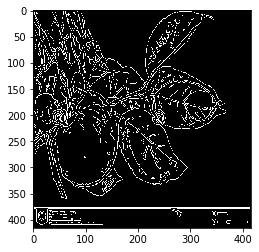

In [2]:
img = plt.imread('DataSet/datatrain/LEAF_0157.jpg')
edges2 = pcv.canny_edge_detect(img=img, high_thresh=60, low_thresh =40, sigma=1)
plt.imshow(edges2, interpolation='nearest', cmap='gray')
plt.show()

In [3]:
radius = 2
selem = morph.disk(radius)
cierre = morph.binary_closing(edges2,selem)

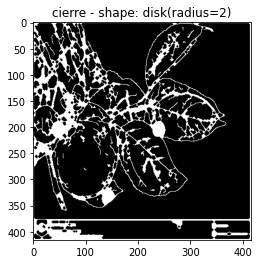

In [4]:
#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, ax2 = plt.subplots()
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray')

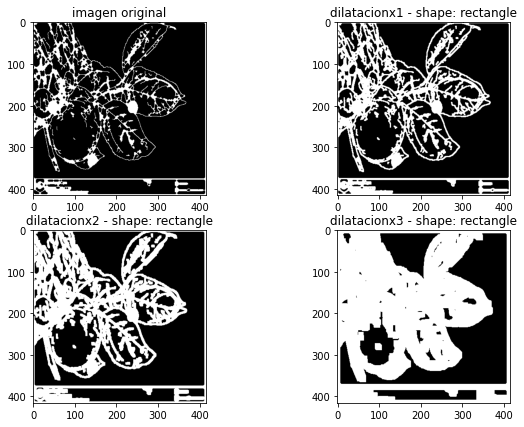

In [5]:
#Crear las máscaras 
elem1 = morph.rectangle(3,3)
elem2 = morph.disk(3)

#Leer imagen de entrada
#img = skimage.io.imread('5_canny_edge_detect.png', as_gray=True)

#Realizar dilataciones acumulativas sobre img
dilatacionx1 = morph.binary_dilation(cierre,elem1)
dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)
dilatacionx4 = morph.binary_dilation(dilatacionx3,elem1)
dilatacionx5 = morph.binary_dilation(dilatacionx4,elem1)
dilatacionx6 = morph.binary_dilation(dilatacionx5,elem1)
dilatacionx7 = morph.binary_dilation(dilatacionx6,elem1)
dilatacionx8 = morph.binary_dilation(dilatacionx7,elem1)
dilatacionx9 = morph.binary_dilation(dilatacionx8,elem1)

#Crear subplot 2x2 para mostrar imagen original y sus dilataciones
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].set_title('imagen original')
ax[0,0].imshow(cierre, cmap='gray')
ax[0,1].set_title('dilatacionx1 - shape: rectangle')
ax[0,1].imshow(dilatacionx1, cmap='gray')
ax[1,0].set_title('dilatacionx2 - shape: rectangle')
ax[1,0].imshow(dilatacionx2, cmap='gray')
ax[1,1].set_title('dilatacionx3 - shape: rectangle')
ax[1,1].imshow(dilatacionx6, cmap='gray')

In [14]:
def mask_creator(path):
    #direccion de la imagen
    img = plt.imread(path)
    
    #deteccion d bordes
    #edges = pcv.canny_edge_detect(img)
    edges2 = pcv.canny_edge_detect(img=img, high_thresh=60, low_thresh =40, sigma=1)
    
    #cierre de bordes
    radius = 2
    selem = morph.disk(radius)
    cierre = morph.binary_closing(edges2,selem)
    
    #dilatacion
    elem1 = morph.rectangle(3,3)
    elem2 = morph.disk(3)
    
    dilatacionx1 = morph.binary_dilation(cierre,elem1)
    dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
    dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)
    dilatacionx4 = morph.binary_dilation(dilatacionx3,elem1)
    dilatacionx5 = morph.binary_dilation(dilatacionx4,elem1)
    dilatacionx6 = morph.binary_dilation(dilatacionx5,elem1)
    dilatacionx7 = morph.binary_dilation(dilatacionx6,elem1)
    dilatacionx8 = morph.binary_dilation(dilatacionx7,elem1)
    dilatacionx9 = morph.binary_dilation(dilatacionx8,elem1)
    
    #cierre = cierre > 128
    filled = morph.remove_small_holes(dilatacionx3,area_threshold=3000) #min_size es el area en pixeles de los huecos a rellenar
    #fig, ax2 = plt.subplots()
    plt.imshow(filled, cmap='gray')
    #return filled

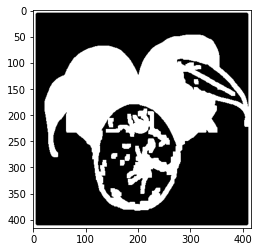

In [15]:
mask_creator('DataSet/datatrain/LEAF_0987.jpg')

In [16]:
from os import listdir
files = listdir('DataSet/datatrain')
for name in files[0:30]:
        #img_or = cv2.imread(f'DataSet/datatrain/{name}')
        mask_creator(f'DataSet/datatrain/{name}')
        plt.savefig(f'DataSet/Mask/{name}')
        plt.close()